In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from resnet_models import create_resnet50_model

2023-01-25 13:08:13.479454: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 13:08:13.761084: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-25 13:08:13.761103: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-25 13:08:14.976324: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Loading Data Set
Three sets are created: training, validation, and test. 
- Labels are generated based on the folder structure. Class name must correspond to the subfolder name.
- Loading in batches, of size 32, to reduce memory usage.
- Label mode is set to categorical, which means that the labels are encoded as a categorical vector.

Bilinear interploation is set to default. This specify the method used in the resizing procedure. By default aspect ratio is not perserved, i.e., the ratio between image width and height.

One hot encoding is utilized when label mode is set to categorical.


The image load documentation is available [here](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) and an example is available [here](https://keras.io/api/data_loading/image/).

In [3]:
train_ds, validation_ds = keras.utils.image_dataset_from_directory(
    directory='../../baseline_training_set/',
    labels='inferred',
    label_mode='categorical',
    shuffle=False,
    batch_size=32,
    validation_split=0.1,
    subset='both',
    image_size=(256, 256)
    )

Found 1692294 files belonging to 14 classes.
Using 1523065 files for training.
Using 169229 files for validation.


2023-01-25 13:09:16.750652: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-25 13:09:16.750988: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-25 13:09:16.751062: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (brothel420): /proc/driver/nvidia/version does not exist
2023-01-25 13:09:16.753021: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Visualizing the Data

In [15]:
# histogram of class distribution in the data set
# remove underscores from class names
class_names = train_ds.class_names
class_names = [name.replace('_', ' ') for name in class_names]
class_counts = [0]*len(class_names)

# get the number of samples in each class
for images, labels in train_ds:
    for i in range(len(labels)):
        class_counts[np.argmax(labels[i])] += 1
# plot the histogram
plt.bar(class_names, class_counts, color=['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


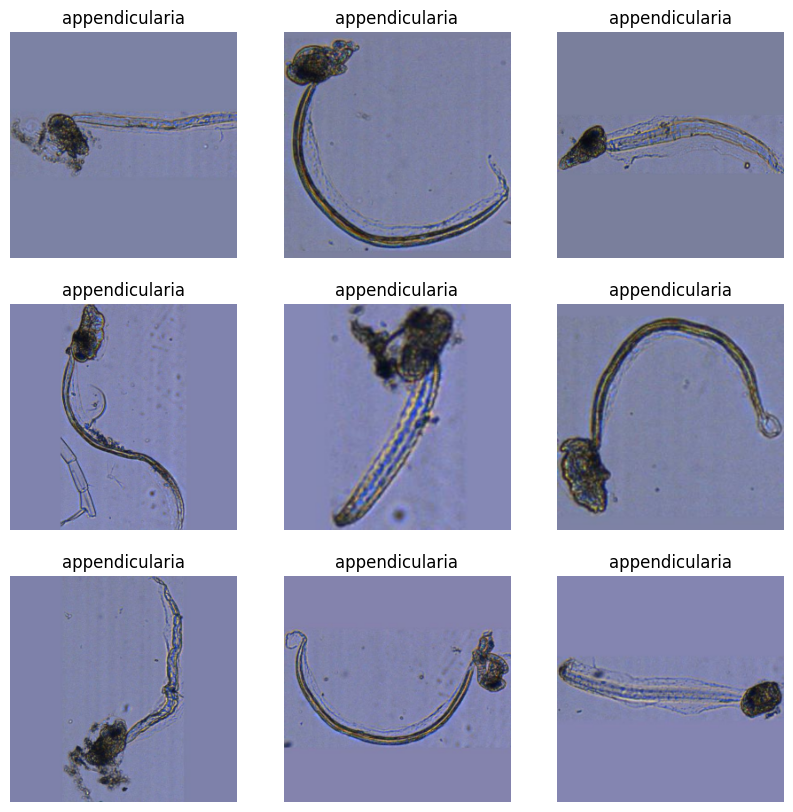

In [ ]:
# plot some images from the data set
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

# Model Creation

In [15]:
def layer_state(model):
    for i, layer in enumerate(model.layers):
        print(i, layer.name, "-" ,layer.trainable)

In [19]:
model = create_resnet50_model()
# print the layer state
layer_state(model)

0 input_10 - True
1 resnet50 - False
2 global_average_pooling2d_4 - True
3 dense_8 - True
4 dense_9 - True


In [22]:
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"]) # compile the model


In [20]:
# define variables for training
epochs = 10
batch_size = 32
verbose = 1

In [23]:
model.fit(train_ds, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=validation_ds) # train the model

Epoch 1/10


ValueError: in user code:

    File "/home/olepedersen/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/olepedersen/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/olepedersen/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/olepedersen/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/olepedersen/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/home/olepedersen/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/olepedersen/.local/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/olepedersen/.local/lib/python3.10/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/olepedersen/.local/lib/python3.10/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/olepedersen/.local/lib/python3.10/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 15) and (None, 10) are incompatible
